In [10]:
include("fld.jl")
using PyPlot
using CSV

┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1273
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1273


In [137]:
tfinal = 10.0

sol = convert(Array,CSV.read("problem1_karlsruhe.csv", header=0));

In [138]:

println("Running until time $(tfinal)")
#ellipse with e = 2, a=1, b=1 thickness 0.5 cm
fact = 1
Nr = 20*fact
Nz = 60*fact
Lz = 6
println("Size of domain in Z is $(Lz)")
Lr = 2
dr = Lr/Nr
dz = Lz/Nz
zmid = range(dz*0.5, stop=Lz-dz*0.5,length=Nz) .- 0.5*Lz
rmid = range(dr*0.5, stop=Lr-dr*0.5,length=Nr) 
T = zeros(Nr*Nz).+1.0e-8

GJperKeVconv = 1e-9*(11604.505*1e3)
density = zeros(Nr,Nz) .+ 0.1

#println("Sigma = ", sigval)
#println("Cv = ", Cvval)
sigma_func(t,T,Nr,Nz,Lr,Lz) = sigval .+ 0*reshape(T,Nr,Nz)
D_func(t,T,Nr,Nz,Lr,Lz,Er,sigma) = 1.0./(3.0.*sigval)
Cv_func(t,T,Nr,Nz,Lr,Lz) = reshape(Cvval.+T.*0, Nr,Nz)
EOS(t,T,Nr,Nz,Lr,Lz) = Cvval.*T
invEOS(t,E,Nr,Nz,Lr,Lz) = (E./Cvval)

#set up problem
b = 1.0
ar = 2.0
e = sqrt(1.0-(b/ar)^2)
bout = 1.5
arout = 2.5
eout = sqrt(1.0-(bout/arout)^2)
maxdens = 10
for i in 1:Nr
    for j in 1:Nz
        theta = atan(rmid[i],zmid[j])
        R = sqrt(rmid[i]^2 + zmid[j]^2)
        rel = b/sqrt(1-(e*cos(theta))^2)
        relout = bout/sqrt(1-(eout*cos(theta))^2)
        if (R > rel) & (R < relout)
            density[i,j] = maxdens
            T[xy_to_vect(i,j,Nr,Nz)] = 0.08
        end
        if (R < 0.25)
            density[i,j] = maxdens
        end
    end
end
sigval = 20.0 .* density 
Cvval = 0.05  .* reshape(density,Nr*Nz)

println(sigval[1,1])
function Q_func(t,T,Nr,Nz,Lr,Lz)
    Q = zeros(Nr,Nz)
end
    

Running until time 10.0
Size of domain in Z is 6
2.0


Q_func (generic function with 1 method)

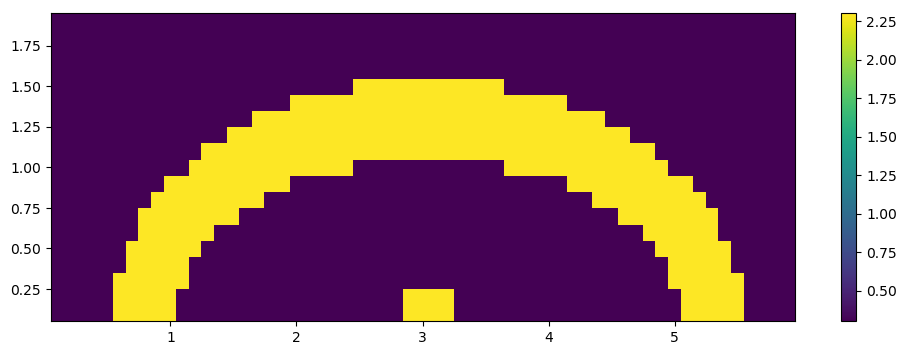

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe53a252940>

In [139]:
figure(figsize=(12,4))
rcenter = range(0.5*dr, stop=Lr-0.5*dr, length=Nr)
zcenter = range(0.5*dz, stop=Lz-0.5*dz, length=Nz)
R,Z = meshgrid(rcenter,zcenter)
sig = sigma_func(0,T,Nr,Nz,Lr,Lz)
pcolormesh(Z,R,log10.(sig))
colorbar()

In [142]:
times, Er_t,T_t = time_dep_RT(tfinal,0.01,T,zeros(Nr*Nz),D_func, sigma_func, Q_func,Cv_func,EOS,invEOS,
                      Nr, Nz, Lr, Lz, lower_z="vacuum", upper_z="vacuum", upper_r="vacuum",LOUD=-1);

1001
Step 1001, t = 10.0


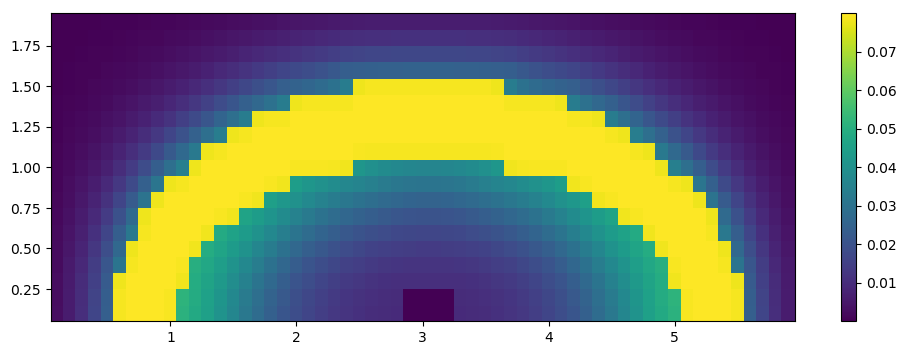

PyObject <matplotlib.colorbar.Colorbar object at 0x7fe56a836908>

In [144]:
figure(figsize=(12,4))
Er_plot = reshape((T_t[:,size(times)[1]]),Nr,Nz)
pcolormesh(Z,R,Er_plot)
colorbar()

In [112]:
rcenter = range(0.5*dr, stop=Lr-0.5*dr, length=Nr)
zcenter = range(0.5*dz, stop=Lz-0.5*dz, length=Nz)
R,Z = meshgrid(rcenter,zcenter)

([0.05 0.05 … 0.05 0.05; 0.15 0.15 … 0.15 0.15; … ; 0.85 0.85 … 0.85 0.85; 0.95 0.95 … 0.95 0.95], [0.001 0.003 … 0.057 0.059; 0.001 0.003 … 0.057 0.059; … ; 0.001 0.003 … 0.057 0.059; 0.001 0.003 … 0.057 0.059])

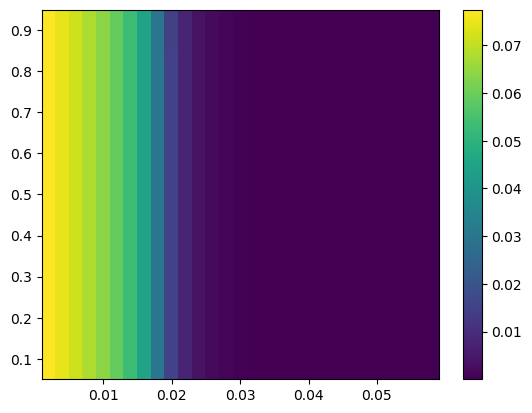

PyObject <matplotlib.colorbar.Colorbar object at 0x1588c4910>

In [113]:
pcolormesh(Z,R,Tr_plot)
colorbar()

In [114]:
println(T_plot[5,:]*1000)

[77.45884419533827, 74.65338044004778, 71.52504732428696, 67.98984311321047, 63.91936241646219, 59.09859826095941, 53.11285110211229, 44.9298052858454, 28.50819722579295, 3.038078391084346, 0.19078076673313035, 0.011984122850556483, 0.0007615805780431473, 5.717450892473838e-5, 1.296100558917297e-5, 1.018585363788608e-5, 1.001166548784711e-5, 1.0000732208463963e-5, 1.0000045958577995e-5, 1.0000002884685091e-5, 1.0000000181063124e-5, 1.0000000011364649e-5, 1.0000000000713182e-5, 1.0000000000044607e-5, 1.0000000000002637e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5, 1.0e-5]


In [115]:
println(Array(zmid))

[0.001, 0.003, 0.005, 0.007, 0.009, 0.011, 0.013, 0.015, 0.017, 0.019, 0.021, 0.023, 0.025, 0.027, 0.029, 0.031, 0.033, 0.035, 0.037, 0.039, 0.041, 0.043, 0.045, 0.047, 0.049, 0.051, 0.053, 0.055, 0.057, 0.059]


In [9]:
import Pkg; Pkg.add("HDF5")
import Pkg; Pkg.add("CSV")

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
  [f67ccb44] + HDF5 v0.12.5
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]
 Resolving package versions...
 Installed PooledArrays ────── v0.5.3
 Installed CategoricalArrays ─ v0.7.6
 Installed FilePathsBase ───── v0.7.0
 Installed DataFrames ──────── v0.20.0
 Installed WeakRefStrings ──── v0.6.2
 Installed CSV ─────────────── v0.5.22
  Updating `~/.julia/environments/v1.3/Project.toml`
  [336ed68f] + CSV v0.5.22
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [336ed68f] + CSV v0.5.22
  [324d7699] + CategoricalArrays v0.7.6
  [9a962f9c] + DataAPI v1.1.0
  [a93c6f00] + DataFrames v0.20.0
  [e2d170a0] + DataValueInterfaces v1.0.0
  [48062228] + FilePathsBase v0.7.0
  [41ab1584] + InvertedIndices v1.0.0
  [82899510] + IteratorInterfaceExtensions v1.0.0
  [e1d29d7a] + Missings v0.4.3
  [2dfb63ee] + PooledArrays v0.5.3
  [a2af1166] + SortingAlgorithms v0.3.1
  [3783bdb8] + TableTr